<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Packages
<a class="anchor" id="1"></a> 

In [1]:
import pandas as pd
import numpy as np

import snscrape.modules.twitter as sntwitter

import re, string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Scrap Twitter Search
<a class="anchor" id="1"></a> 

In [2]:
usernames = ['ganjarpranowo', 'prabowo', 'aniesbaswedan', 'AgusYudhoyono', 'ridwankamil']

In [31]:
# Tweet list
tweets_list = []

for i, tweet in enumerate(sntwitter.TwitterHashtagScraper('AniesPresiden2024').get_items()):
    if i > 100:
        break
    tweets_list.append([tweet.id, tweet.date, tweet.user.username, tweet.content])

tweets_df = pd.DataFrame(tweets_list, columns=['ID', 'Datetime', 'Username', 'Content'])
tweets_df.head()

,ID,Datetime,Username,Content
0,1595392154486345728,2022-11-23 12:21:45+00:00,Iwan52333552,Sehat selalu Pak @aniesbaswedan ...👍🙏🇲🇨\n#Anie...
1,1595392005252997121,2022-11-23 12:21:09+00:00,Adam03072022,"Anies pemimpin jujur, cerdas &amp; tegas.\n\nW..."
2,1595390765106364416,2022-11-23 12:16:13+00:00,Adam03072022,"Wes wayahe\n\nSiapa Presidennya, ANIES\n\nApa ..."
3,1595390411060936708,2022-11-23 12:14:49+00:00,Adam03072022,Orang BAIK bersatu membela pemimpin BAIK dari ...
4,1595387539824979970,2022-11-23 12:03:25+00:00,Adam03072022,Pemimpin jujur &amp; cerdas selamatkan rakyat ...


# Preprocessing

## Missing Value

In [4]:
tweets_df.isnull().sum()

ID          0
Datetime    0
Username    0
Content     0
dtype: int64

## Remove Rubbish

In [5]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub("@[A-Za-z0-9_]+", "", text)  # Menghapus @<name> [mention twitter]
    text = re.sub("#\w+", "", text) # Menghapus hashtag #
    text = re.sub("\[.*?\]", "", text)  # Menghapus [string]
    text = re.sub("https?://\S+|www\.\S+", "", text)    # Menghapus link
    text = re.sub("<.*?>+", "", text)   # Menghapus <string>
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text) # Menghapus tanda baca
    text = re.sub("\w*\d\w*", "", text) # Menghapus kata + angka ex: t0g3l
    text = re.sub("\d+", "", text)  # Menghapus kata diawali huruf ex: 45merdeka
    text = re.sub("amp", " ", text) # Menghapus &amp; pada kata
    text = re.sub("\s+", " ", text).strip() # Menghapus whitespace di antara kata
    text = text.replace("\n", " ")  # Menghapus tag newline
    text = " ".join(text.split())
    return text

In [6]:
tweets_df['clean_text'] = tweets_df['Content'].apply(lambda x: clean_text(x))

# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: stemmer.stem(x))

# Hapus stopwords
custom_stop = ['yg', 'ga', 'utk', 'aja', 'gt', 'jadi', 'tdk', 'pake', 'krn', 'dgn', 'jd', 'sdh']
factory_stop = StopWordRemoverFactory()
stopword = factory_stop.create_stop_word_remover(custom_stop)

tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: stopword.remove(x))

In [7]:
tweets_df.head()

,ID,Datetime,Username,Content,clean_text
0,1595384405425811461,2022-11-23 11:50:57+00:00,bos_sir,Untuk teman di Palu - Sulawesi Tengah.\nSampai...,teman palu sulawesi tengah ai jumpa
1,1595371562286616576,2022-11-23 10:59:55+00:00,ClipDramaMovies,Selamat datang di Negara China #XiJinping #Jok...,selamat negara china
2,1595365749023203328,2022-11-23 10:36:49+00:00,anindeeyaa,@IMCMushroom #AniesPresiden2024 aamiin Allahum...,aamiin allahumma aamiin
3,1595361773846085632,2022-11-23 10:21:01+00:00,diva_acm,Karena beliau bikin rakyatnya bahagia tanpa ad...,beliau bikin rakyat bahagia derita jakarta bah...
4,1595359106151641088,2022-11-23 10:10:25+00:00,dr_altila,Insyaallah Anies Baswedan diagendakan akan ber...,insyaallah anies baswedan agenda kunjung kota ...


# EDA

## Wordcloud

In [8]:
# Join list as 1 string
text_content = list(tweets_df['clean_text'])

text_string = ''
for elem in text_content:
    text_string = ' '.join([text_string, str(elem)])

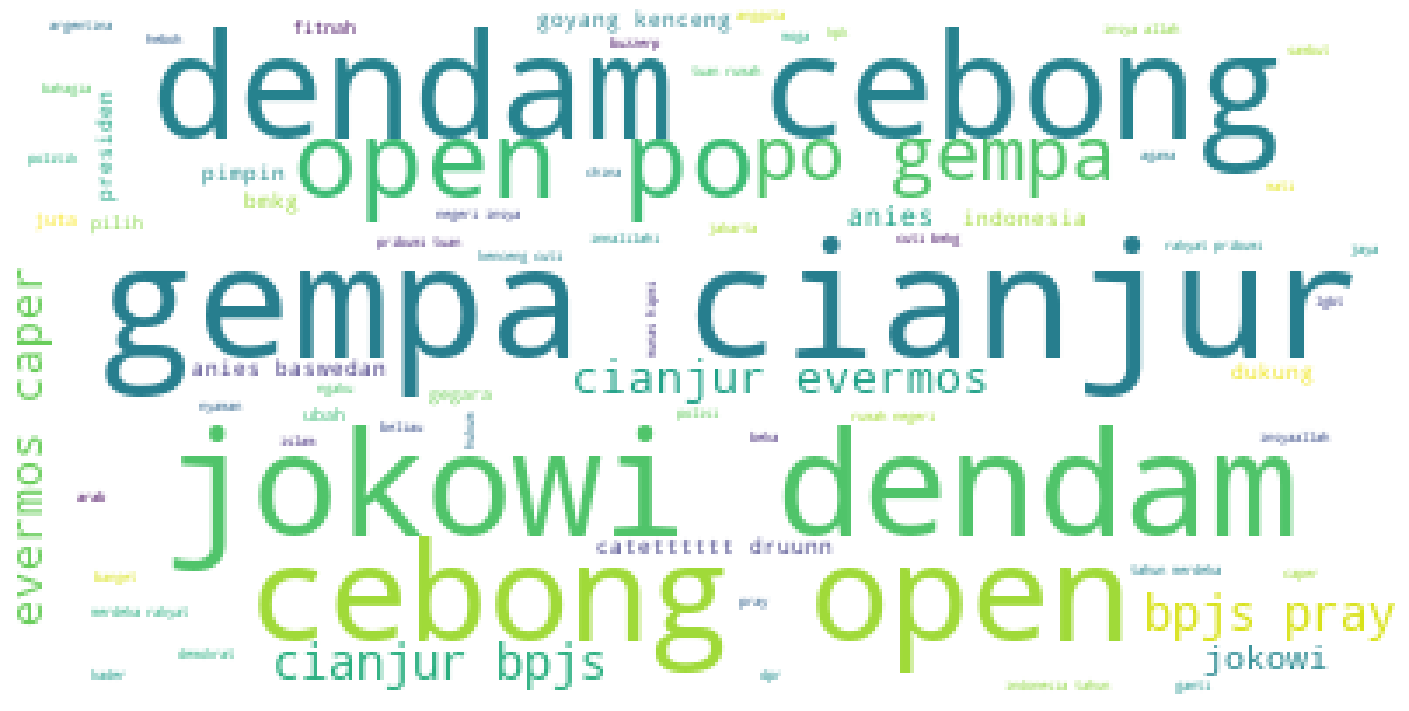

In [9]:
wordcloud = WordCloud(background_color='white').generate(text_string)

# plot wordcloud
plt.figure(figsize=(25,15))
plt.imshow(wordcloud)

# Hapus nilai axis
plt.axis('off')
plt.show()

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Scrap User Profile
<a class="anchor" id="1"></a> 

In [24]:
# Tweet list
user_tweets_list = []

for i, tweet in enumerate(sntwitter.TwitterUserScraper('aniesbaswedan').get_items()):
    if i > 100:
        break
    user_tweets_list.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

user_tweets_df = pd.DataFrame(user_tweets_list, columns=['Date', 'Likes', 'Source Label', 'Content'])
user_tweets_df.head()

,Date,Likes,Source Label,Content
0,2022-11-22 12:02:20+00:00,4112,Twitter for iPhone,Pesan untuk semua teman-teman relawan.\n\n#Ani...
1,2022-11-21 23:46:19+00:00,570,Twitter for iPhone,Apabila ingin membantu berupa pengumpulan bara...
2,2022-11-21 23:46:18+00:00,4078,Twitter for iPhone,Mari bantu saudara2 kita yg terdampak gempa di...
3,2022-11-21 14:00:12+00:00,5333,Twitter for iPhone,Innalillahi wa inna ilaihi raji'un. Turut berd...
4,2022-11-20 12:08:10+00:00,567,Twitter for iPhone,https://t.co/duelIf1O6l


# Preprocessing

## Missing Value

In [25]:
user_tweets_df.isnull().sum()

Date            0
Likes           0
Source Label    0
Content         0
dtype: int64

## Remove Rubbish

In [26]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub("@[A-Za-z0-9_]+", "", text)  # Menghapus @<name> [mention twitter]
    text = re.sub("#\w+", "", text) # Menghapus hashtag #
    text = re.sub("\[.*?\]", "", text)  # Menghapus [string]
    text = re.sub("https?://\S+|www\.\S+", "", text)    # Menghapus link
    text = re.sub("<.*?>+", "", text)   # Menghapus <string>
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text) # Menghapus tanda baca
    text = re.sub("\w*\d\w*", "", text) # Menghapus kata + angka ex: t0g3l
    text = re.sub("\d+", "", text)  # Menghapus kata diawali huruf ex: 45merdeka
    text = re.sub("amp", " ", text) # Menghapus &amp; pada kata
    text = re.sub("\s+", " ", text).strip() # Menghapus whitespace di antara kata
    text = text.replace("\n", " ")  # Menghapus tag newline
    text = " ".join(text.split())
    return text

In [27]:
user_tweets_df['clean_text'] = user_tweets_df['Content'].apply(lambda x: clean_text(x))

# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

user_tweets_df['clean_text'] = user_tweets_df['clean_text'].apply(lambda x: stemmer.stem(x))

# Hapus stopwords
custom_stop = ['yg', 'ga', 'utk', 'aja', 'gt', 'jadi', 'tdk', 'pake', 'krn', 'dgn', 'jd', 'sdh']
factory_stop = StopWordRemoverFactory()
stopword = factory_stop.create_stop_word_remover(custom_stop)

user_tweets_df['clean_text'] = user_tweets_df['clean_text'].apply(lambda x: stopword.remove(x))

In [28]:
user_tweets_df.head()

,Date,Likes,Source Label,Content,clean_text
0,2022-11-22 12:02:20+00:00,4112,Twitter for iPhone,Pesan untuk semua teman-teman relawan.\n\n#Ani...,pesan temanteman rawan
1,2022-11-21 23:46:19+00:00,570,Twitter for iPhone,Apabila ingin membantu berupa pengumpulan bara...,bantu upa kumpul barang butuh desak warga hubu...
2,2022-11-21 23:46:18+00:00,4078,Twitter for iPhone,Mari bantu saudara2 kita yg terdampak gempa di...,mari bantu terd ak gempa cianjur taut galang d...
3,2022-11-21 14:00:12+00:00,5333,Twitter for iPhone,Innalillahi wa inna ilaihi raji'un. Turut berd...,innalillahi wa inna ilaihi rajiun duka bencana...
4,2022-11-20 12:08:10+00:00,567,Twitter for iPhone,https://t.co/duelIf1O6l,


# EDA

## Wordcloud

In [29]:
# Join list as 1 string
text_content = list(user_tweets_df['clean_text'])

text_string = ''
for elem in text_content:
    text_string = ' '.join([text_string, str(elem)])

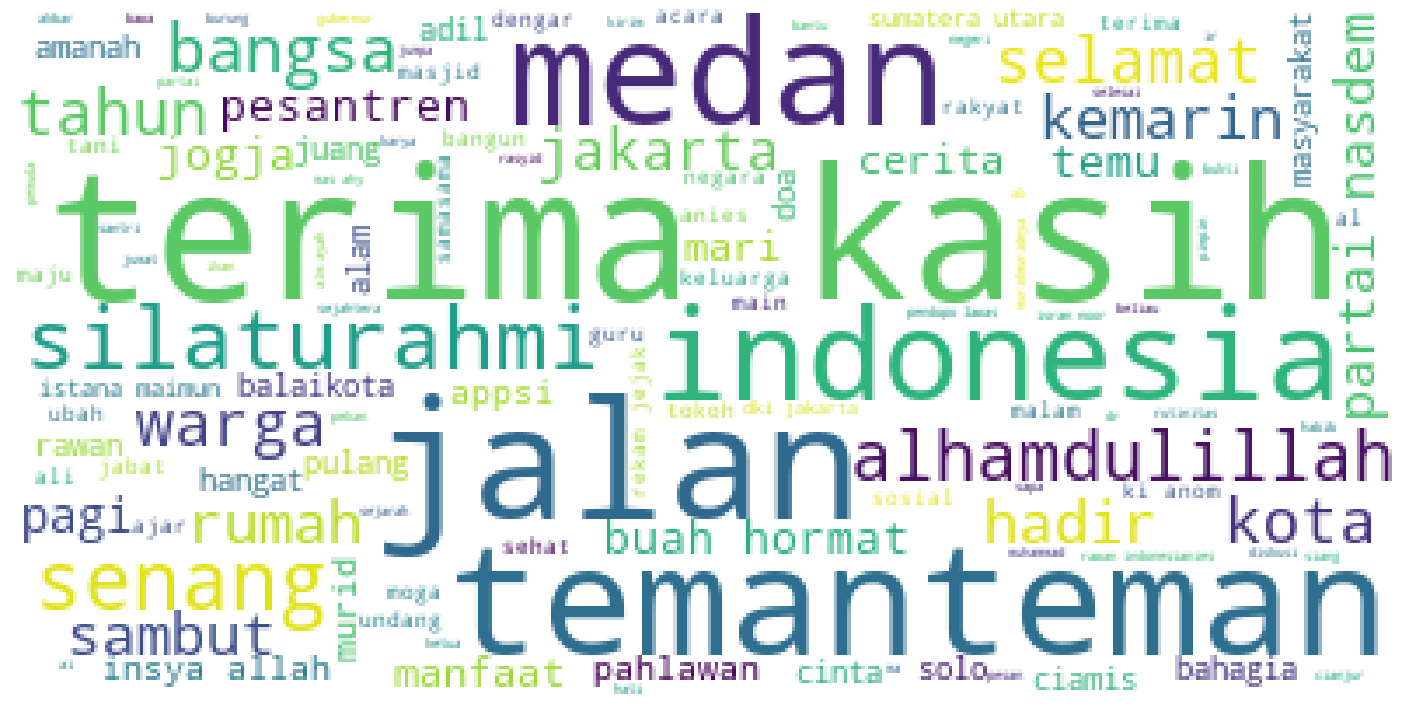

In [30]:
wordcloud = WordCloud(background_color='white').generate(text_string)

# plot wordcloud
plt.figure(figsize=(25,15))
plt.imshow(wordcloud)

# Hapus nilai axis
plt.axis('off')
plt.show()